In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('D:\\Dataset\\Obesity_Classification.csv')

In [3]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [4]:
df = df.drop('ID' , axis=1)

In [5]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


In [6]:
df.tail()

,Age,Gender,Height,Weight,BMI,Label
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight
107,31,Male,190,20,8.3,Underweight


In [7]:
print(f'Total Missing Values: \n{df.isna().sum()}')

Total Missing Values: 
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [8]:
columns = ['Age' , 'Height' , 'Weight' , 'BMI']

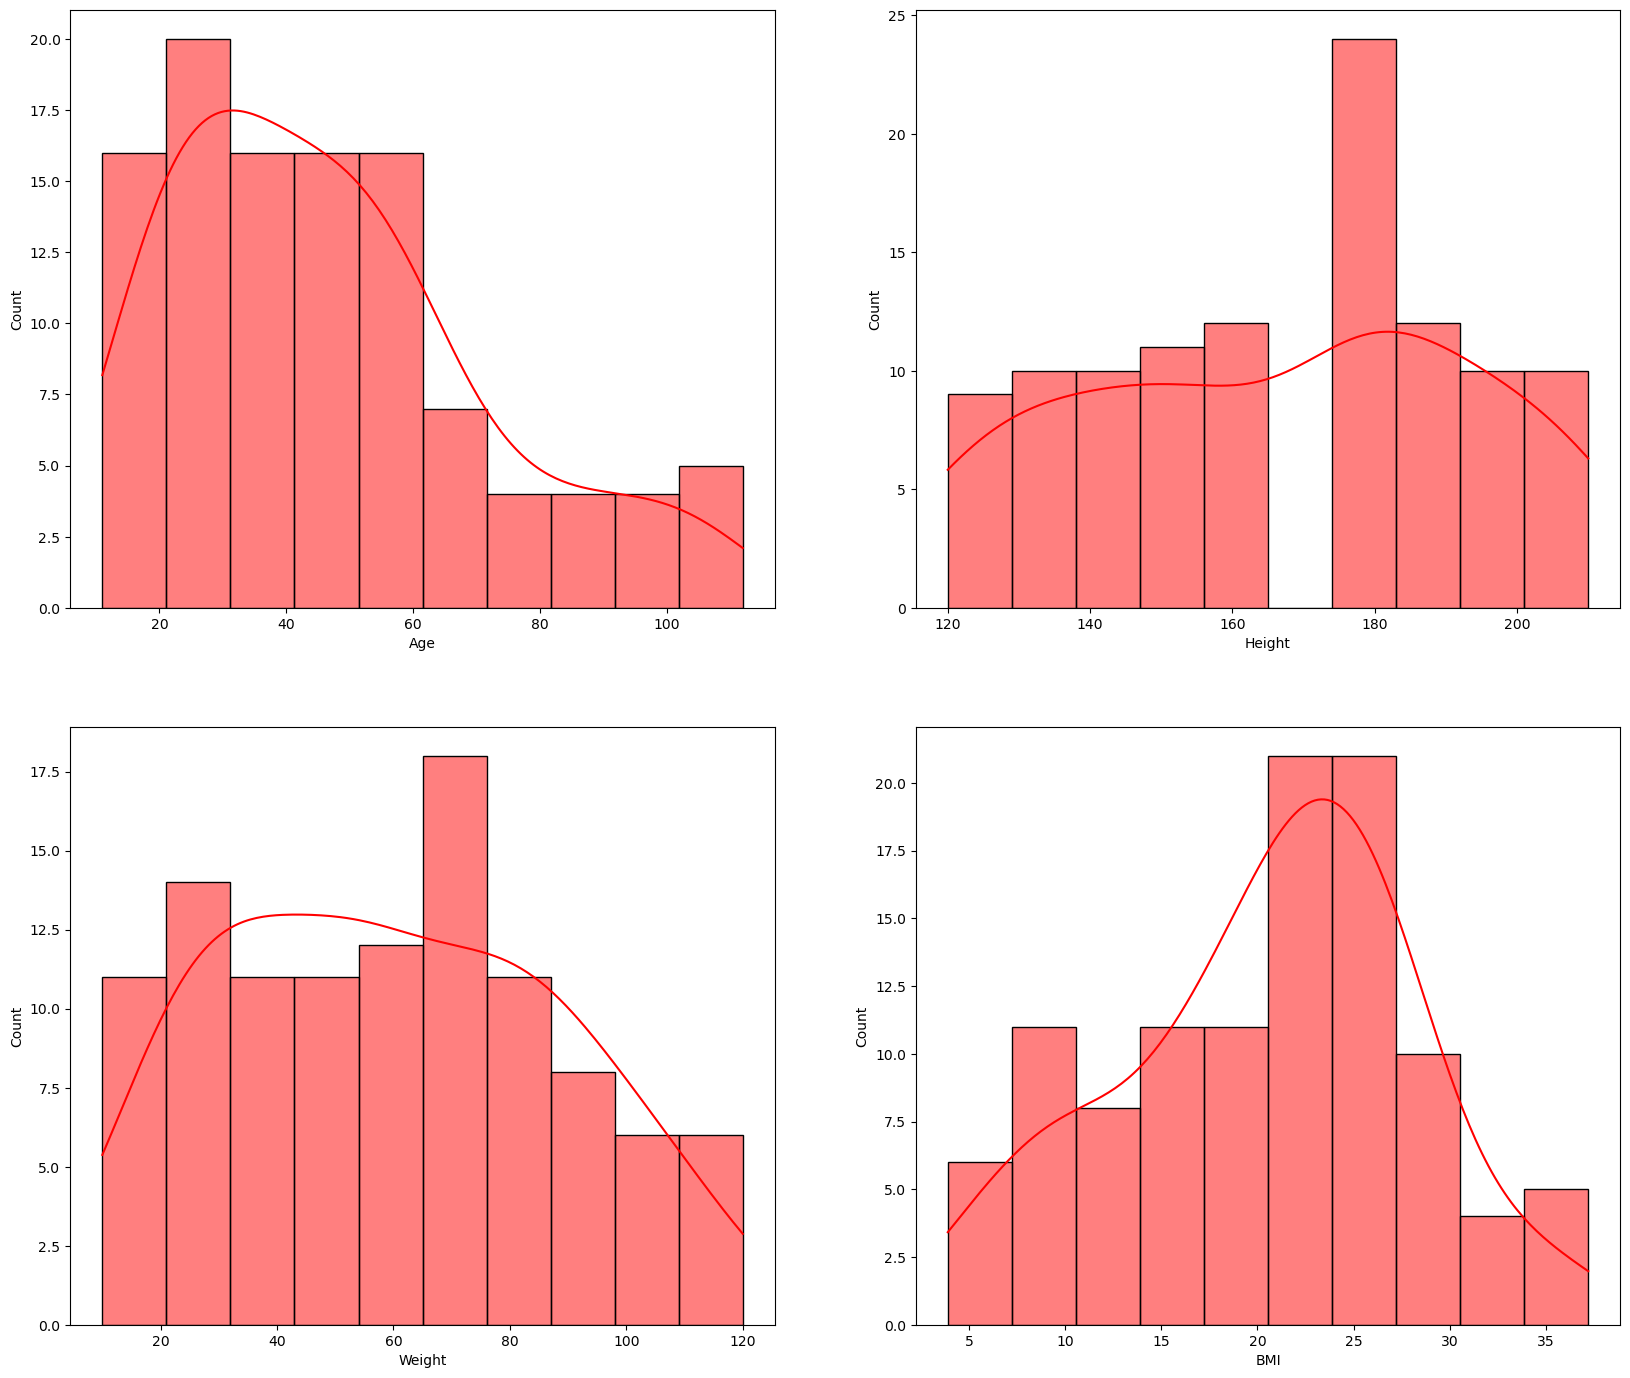

In [9]:
plt.figure(figsize = (20, 45))
for i, col in enumerate(columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(data = df, x = col, kde = True, bins = round(np.sqrt(len(df))), color = 'r')
plt.show()

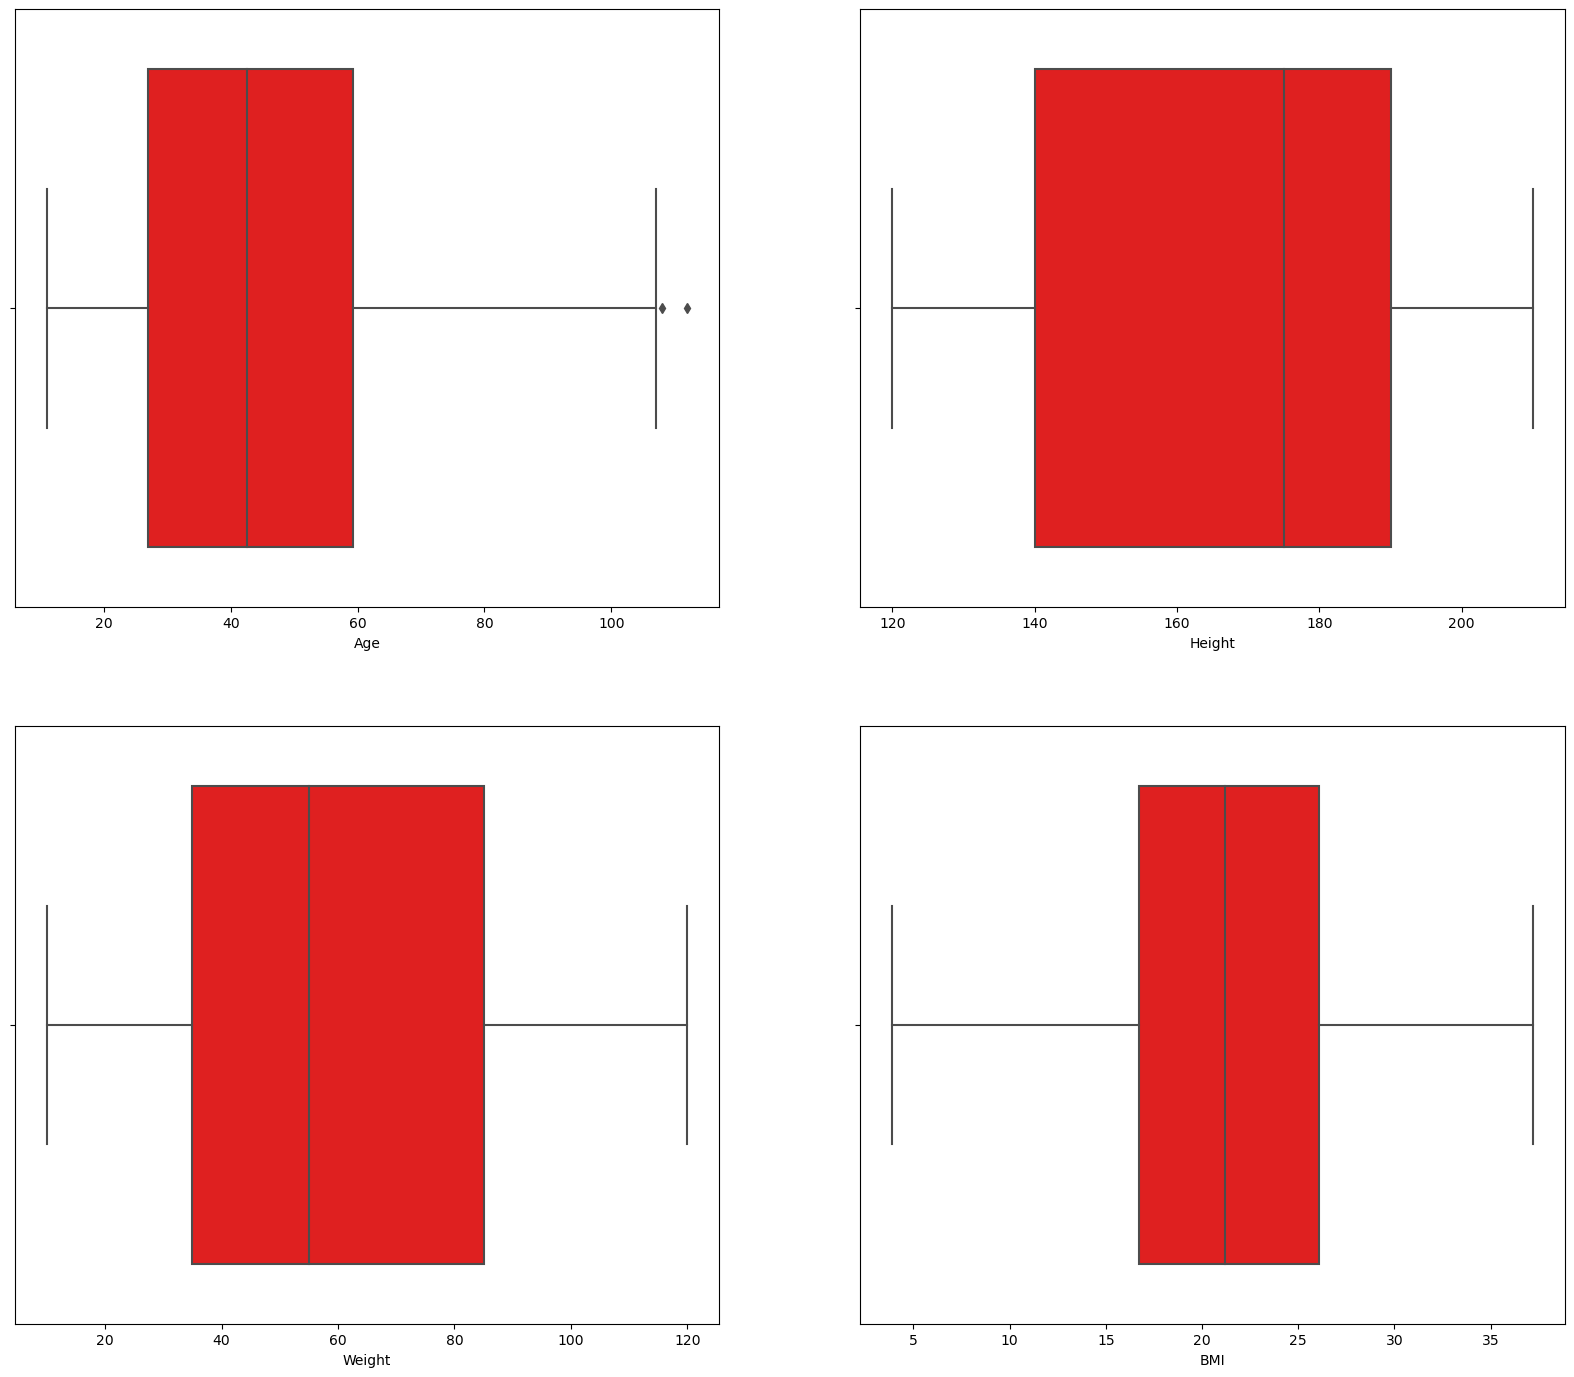

In [10]:
plt.figure(figsize = (20, 45))
for i, col in enumerate(columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(data = df, x = col, color = 'r')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [12]:
num_classes = df['Label'].nunique()

In [13]:
num_classes

4

In [14]:
df['Label'] = pd.factorize(df['Label'])[0]

In [15]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,1,175,80,25.3,0
1,30,0,160,60,22.5,0
2,35,1,180,90,27.3,1
3,40,0,150,50,20.0,2
4,45,1,190,100,31.2,3


In [16]:
df.tail()

,Age,Gender,Height,Weight,BMI,Label
103,11,1,175,10,3.9,2
104,16,0,160,10,3.9,2
105,21,1,180,15,5.6,2
106,26,0,150,15,5.6,2
107,31,1,190,20,8.3,2


In [17]:
from scipy import stats
from scipy.stats import zscore

z_scores = zscore(df)
outliers = (np.abs(z_scores)>3)
outliers.sum()

Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [18]:
pearson_coef_val = []
p_val = []

for col in df.columns:
    pearson_coef, p_value = stats.pearsonr(df[col], df['Label'])
    pearson_coef_val.append(pearson_coef)
    p_val.append(round(p_value, 4))

In [19]:
is_significant = []

for i in p_val:
    if i> 0.1:
        is_significant.append('No')
    else:
        is_significant.append('Yes')
is_significant

['No', 'No', 'No', 'No', 'No', 'Yes']

In [20]:
data = {
    'Feature': df.columns,
    'Correlation Coefficient': pearson_coef_val,
    'is_significant': is_significant
}

df_sig = pd.DataFrame(data)
df_sig

,Feature,Correlation Coefficient,is_significant
0,Age,0.098995,No
1,Gender,0.004124,No
2,Height,0.145028,No
3,Weight,-0.089955,No
4,BMI,-0.137668,No
5,Label,1.000000,Yes


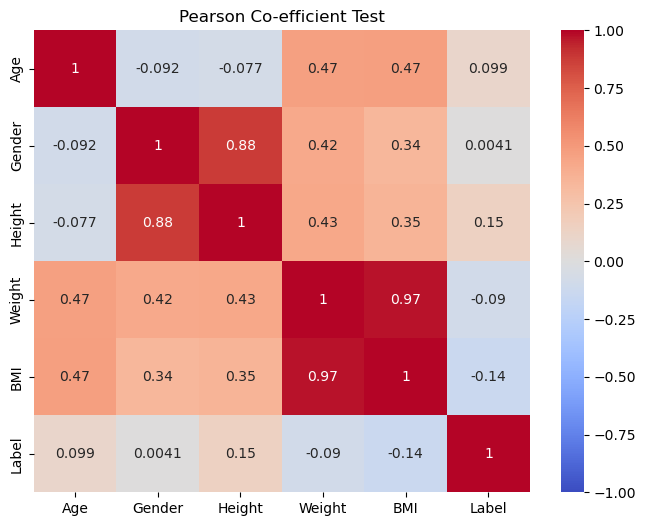

In [21]:
corr_matrix = df.corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Pearson Co-efficient Test')
plt.show()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Label' , axis = 1)
y = df['Label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
df.shape

(108, 6)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [28]:
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy of KNN : {accuracy}%")

Accuracy of KNN : 95.45454545454545%


In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
clf = GaussianNB()

In [31]:
clf.fit(X_train_scaled, y_train)

GaussianNB()

In [32]:
y_pred_2 = clf.predict(X_test_scaled)

In [33]:
accuracy_2 = accuracy_score(y_test, y_pred_2)*100

In [34]:
print(f"Accuracy of Naive Bayes Classifier : {accuracy_2}%")

Accuracy of Naive Bayes Classifier : 86.36363636363636%
